# Jupyter Notebook: Data Cleaning for Ecommerce Consumer Behavior Analysis

In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
from unidecode import unidecode

# Display all columns for inspection
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)


In [66]:
# Cell 2: Load the data
file_path = 'EcommerceConsumerBehaviorAnalysisData_COS20089_A2.csv'
df = pd.read_csv(file_path)

# Initial inspection
display(df.head())
df.info()



,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Time_Spent_on_Product_Research(hours),Social_Media_Influence,Discount_Sensitivity,Return_Rate,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,4,Mixed,5,5,2.0,NaN,Somewhat Sensitive,1,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,11,In-Store,3,1,2.0,Medium,Not Sensitive,1,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,2,Mixed,5,5,0.3,Low,Not Sensitive,1,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,6,Mixed,3,1,1.0,High,Somewhat Sensitive,0,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,6,Mixed,3,4,0.0,Medium,Not Sensitive,2,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [67]:
# Cell 3: Clean the Location column
#  - Strip leading/trailing whitespace
#  - Normalize text (remove accents, unify case)
#  - Keep 'None' entries unchanged
def clean_location(loc):
    if pd.isna(loc) or loc == 'None':
        return loc  # preserve NaN or literal 'None'
    loc_str = str(loc).strip()
    loc_norm = unidecode(loc_str).title()
    return loc_norm

# Apply cleaning
df['Location'] = df['Location'].apply(clean_location)

# Verify uniqueness
display(df['Location'].unique())



array(['Evry', 'Huocheng', 'Huzhen', 'Wiwili', 'Nara', 'Boro Utara',
       'Liren', 'Taocheng', 'Grabo', 'Pryamitsyno', 'Punta Gorda', 'Gyor',
       'Gaosheng', 'Rokytne', 'Alameda', 'Dhankuta', 'Jindong', 'Ngeru',
       'White Rock', 'Monastyrshchina', 'Pangkalanbunut', 'Lederaba',
       'Lugo', 'Sao Roque', 'Bani Khaddash', 'Montpellier', 'Nesovice',
       'Pasirhuni', 'Glendale', 'Tala', 'Marseille', 'Nasielsk',
       'Paris 06', 'Bronnitsy', 'Inayauan', 'Qianjin', 'Bagahanlad',
       'Rzewnie', 'Strabychovo', 'Hongqi', 'Oeoh', "Topol'Noye",
       'Kovarov', 'Majdal Bani Fadil', 'Delta Del Tigre',
       'Santa Cruz La Laguna', 'Manchester', 'Norrkoping', 'Sosno',
       'Pella', 'Namur', 'Benevides', 'Qinghaihu', 'Alfeizerao',
       'Prostredni Becva', 'Oeiras', 'Kythnos', 'Rizal', 'Fullerton',
       'Huaidao', 'Bilice', 'Isla Verde', 'Hunkuyi', 'Shiree',
       'Strezhevoy', 'Longxing', 'Jesus Menendez', 'Hongguang', 'Pilaya',
       'Camp Ithier', 'Holboo', 'Luxi', 'Ost

In [68]:
# Cell 4: Preserve Purchase_Amount as-is (keep currency symbols and formatting)
print('Purchase_Amount dtype before:', df['Purchase_Amount'].dtype)



Purchase_Amount dtype before: object


In [69]:
# Cell 5: Convert Time_of_Purchase to datetime
#  - Preserve original strings in 'Time_of_Purchase_str'
#  - For entries with 'None', keep literal 'None' in cleaned column

df['Time_of_Purchase_str'] = df['Time_of_Purchase']
df['Time_of_Purchase'] = pd.to_datetime(
    df['Time_of_Purchase_str'], infer_datetime_format=True, errors='coerce'
)
# Restore 'None' for those entries
df.loc[df['Time_of_Purchase_str'] == 'None', 'Time_of_Purchase'] = 'None'

# Verify conversion
display(df[['Time_of_Purchase_str', 'Time_of_Purchase']].head())



C:\Users\USER\AppData\Local\Temp\ipykernel_36336\2091048217.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Time_of_Purchase'] = pd.to_datetime(
C:\Users\USER\AppData\Local\Temp\ipykernel_36336\2091048217.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['Time_of_Purchase_str'] == 'None', 'Time_of_Purchase'] = 'None'


,Time_of_Purchase_str,Time_of_Purchase
0,3/1/2024,2024-03-01 00:00:00
1,4/16/2024,2024-04-16 00:00:00
2,3/15/2024,2024-03-15 00:00:00
3,10/4/2024,2024-10-04 00:00:00
4,1/30/2024,2024-01-30 00:00:00


In [70]:
# Cell 6: Define safe numeric converters to preserve 'None'
def safe_to_float(x):
    if pd.isna(x) or x == 'None':
        return x
    try:
        return float(x)
    except Exception:
        return np.nan

# Convert research time
df['Time_Spent_on_Product_Research(hours)'] = df['Time_Spent_on_Product_Research(hours)'].apply(safe_to_float)

# Convert other integer-like columns safely
int_cols = ['Age', 'Product_Rating', 'Return_Rate', 'Customer_Satisfaction', 'Time_to_Decision']
for col in int_cols:
    def safe_to_int(x):
        if pd.isna(x) or x == 'None':
            return x
        try:
            return int(float(x))
        except Exception:
            return np.nan
    df[col] = df[col].apply(safe_to_int)

# Leave Social_Media_Influence and Engagement_with_Ads untouched to prevent data loss
display(df[['Social_Media_Influence', 'Engagement_with_Ads']].head())



,Social_Media_Influence,Engagement_with_Ads
0,NaN,NaN
1,Medium,High
2,Low,Low
3,High,NaN
4,Medium,NaN


In [71]:
# Cell 7: Final overview
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

None

In [72]:
# Cell 8: Replace all remaining NaN values with literal 'None'
# This ensures no blank entries remain

df = df.fillna('None')


C:\Users\USER\AppData\Local\Temp\ipykernel_36336\1440807561.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna('None')


In [73]:
# Cell 9: Save cleaned dataset
df.to_csv('EcommerceConsumerBehavior_Cleaned.csv', index=False)
print("Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv")
display(df.info())

# Save cleaned data
df.to_csv('EcommerceConsumerBehavior_Cleaned.csv', index=False)
print("Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv")

Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer_ID                            1000 non-null   object        
 1   Age                                    1000 non-null   int64         
 2   Gender                                 1000 non-null   object        
 3   Income_Level                           1000 non-null   object        
 4   Marital_Status                         1000 non-null   object        
 5   Education_Level                        1000 non-null   object        
 6   Occupation                             1000 non-null   object        
 7   Location                               1000 non-null   object        
 8   Purchase_Category                      1000 non-null   object        
 9   P

None

Cleaned dataset saved to EcommerceConsumerBehavior_Cleaned.csv


# Predicting Purchase Intent Using Consumer Behavior Data

This notebook builds and evaluates models to predict the type of purchase intent (e.g., Need-based, Impulsive, etc.) using e-commerce consumer behavior data.


## Logistic Regression and Random Forest

### Load Libraries and Dataset
This section loads essential libraries used for:
- Data preprocessing and cleaning (`pandas`, `numpy`)
- Visualization (`matplotlib`)
- Machine Learning models and evaluation (`scikit-learn`)

In [74]:
# Import necessary libraries for data manipulation, visualization, modeling, and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Data Preprocessing
- Dropped `Customer_ID` (likely a unique identifier) and `Time_of_Purchase_str` (presumably redundant).
- Checked for missing values.
- Filled any missing numeric values using the **median** to avoid bias from outliers.

In [75]:
df = pd.read_csv('EcommerceConsumerBehavior_Cleaned.csv')  # Replace with actual file

# Drop non-informative columns
df.drop(['Customer_ID', 'Time_of_Purchase_str'], axis=1, inplace=True)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Fill missing values (if any) with median
df.fillna(df.median(numeric_only=True), inplace=True)

Missing values per column:
 Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Purchase           

### Feature and Target Separation
- Target: `Purchase_Intent` is encoded for classification.
- Features are split into **categorical** and **numerical** for tailored preprocessing.

In [76]:
target = 'Purchase_Intent'
X = df.drop(target, axis=1)
y = df[target]

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separate features by type
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Preprocessing and Pipelines
To streamline preprocessing and modeling:
- A `ColumnTransformer` standardizes numeric features and one-hot encodes categorical ones.
- Pipelines are constructed for:
  - **Logistic Regression** (baseline linear model)
  - **Random Forest** (ensemble model that handles non-linear relationships)

In [77]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

logreg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='ovr'))
])

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

### Train/Test Split
- Split the dataset into 80% training and 20% testing.
- Used **stratified sampling** to maintain class balance in both splits.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

### Model Training
- Trained both models using the training set.
- Predictions made on the test set.

In [79]:
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### Model Evaluation
 - Evaluated performance using:
  - **Classification report** (Precision, Recall, F1)
  - **Confusion matrix** to inspect correct vs. incorrect predictions.
- **Random Forest outperformed** Logistic Regression in F1 score and accuracy.

In [80]:
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

   Impulsive       0.20      0.22      0.21        50
  Need-based       0.17      0.18      0.17        51
     Planned       0.21      0.20      0.21        49
 Wants-based       0.14      0.12      0.13        50

    accuracy                           0.18       200
   macro avg       0.18      0.18      0.18       200
weighted avg       0.18      0.18      0.18       200

Confusion Matrix:
 [[11 15 13 11]
 [15  9 12 15]
 [14 14 10 11]
 [16 15 13  6]]

Random Forest Performance:
              precision    recall  f1-score   support

   Impulsive       0.18      0.20      0.19        50
  Need-based       0.25      0.31      0.28        51
     Planned       0.24      0.18      0.21        49
 Wants-based       0.29      0.24      0.26        50

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.23       200
weighted avg       0.24      0.23      0.23 

### Accuracy & F1 Score Comparison
Compare model performance on two metrics:
- **Accuracy**: Overall correctness.
- **F1 Score (weighted)**: Accounts for class imbalance.

This side-by-side bar chart highlights trade-offs between precision and recall, and emphasizes model generalizability.

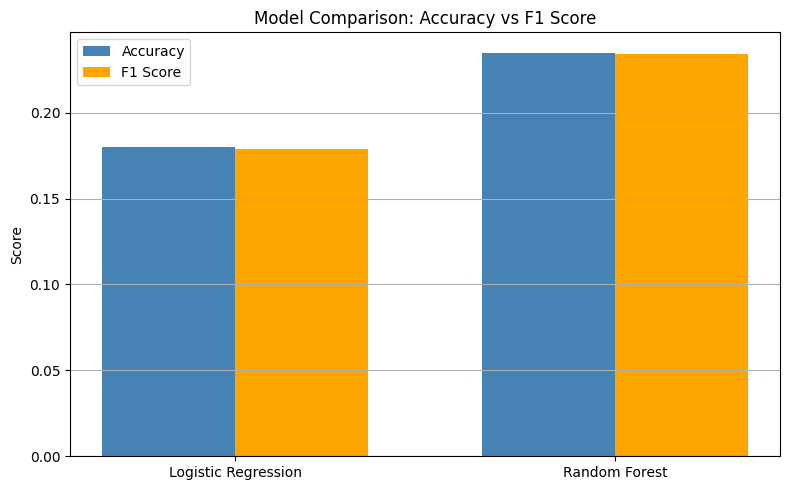

In [81]:
logreg_acc = accuracy_score(y_test, y_pred_logreg)
rf_acc = accuracy_score(y_test, y_pred_rf)

logreg_f1 = f1_score(y_test, y_pred_logreg, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

models = ['Logistic Regression', 'Random Forest']
accuracies = [logreg_acc, rf_acc]
f1_scores = [logreg_f1, rf_f1]

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = np.arange(len(models))

plt.bar(x, accuracies, width=bar_width, label='Accuracy', color='steelblue')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='orange')

plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks(x + bar_width / 2, models)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Feature Importance (Random Forest)
- Visualized top 10 features from Random Forest.
- Helps identify **key predictors** of consumer purchase intent.
- Insights can support **targeted marketing or UX improvements**.

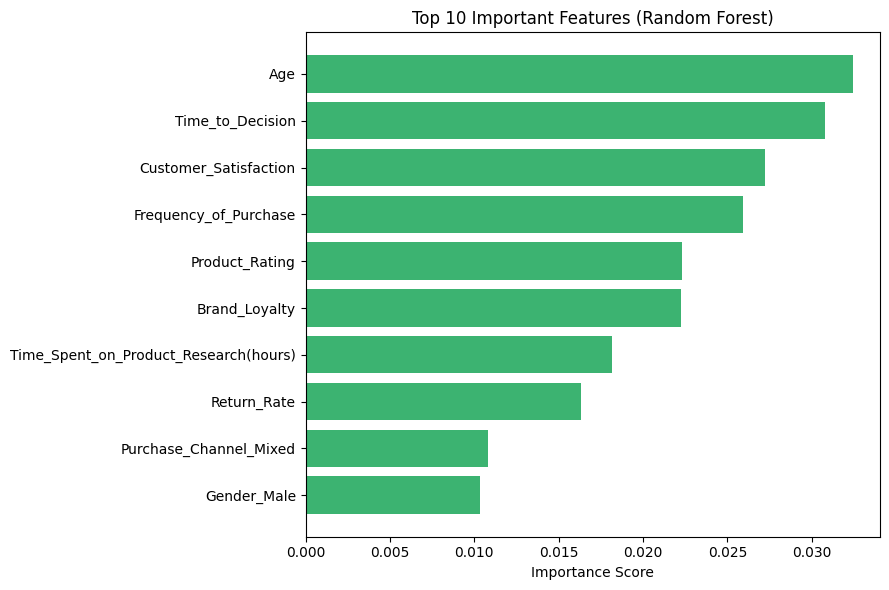

In [82]:
ohe = rf_model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + list(encoded_cat_features)

rf_clf = rf_model.named_steps['classifier']
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[-10:][::-1]
top_features = [all_feature_names[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(9, 6))
plt.barh(top_features, top_importances, color='mediumseagreen')
plt.xlabel('Importance Score')
plt.title('Top 10 Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

###  Additional Visualisations

#### Boxplot: Time Spent on Product Research by Purchase Intent

C:\Users\USER\AppData\Local\Temp\ipykernel_36336\736640227.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=purchase_intents)


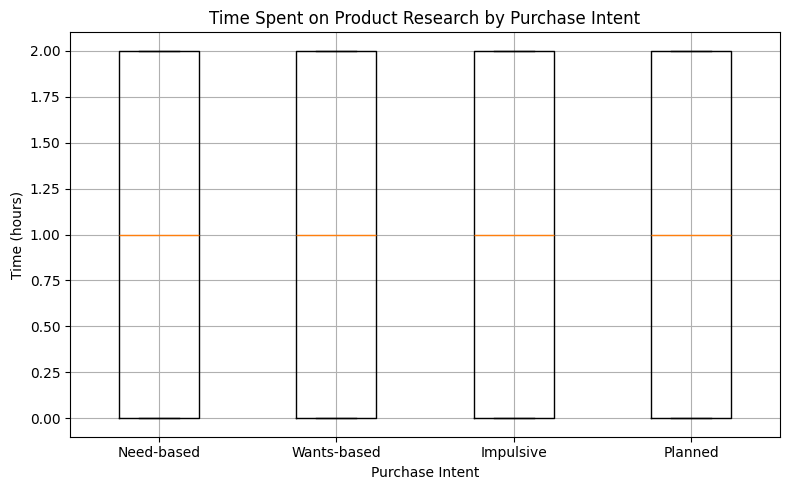

In [83]:
plt.figure(figsize=(8, 5))
purchase_intents = df['Purchase_Intent'].unique()
data = [df[df['Purchase_Intent'] == intent]['Time_Spent_on_Product_Research(hours)'] for intent in purchase_intents]
plt.boxplot(data, labels=purchase_intents)
plt.title('Time Spent on Product Research by Purchase Intent')
plt.ylabel('Time (hours)')
plt.xlabel('Purchase Intent')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Bar Plot: Count of Each Purchase Intent

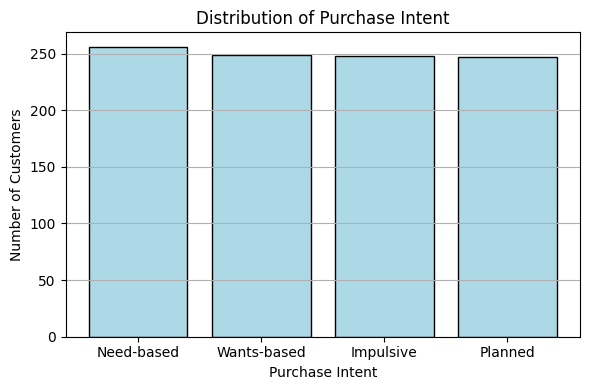

In [84]:
plt.figure(figsize=(6, 4))
intent_counts = df['Purchase_Intent'].value_counts()
plt.bar(intent_counts.index, intent_counts.values, color='lightblue', edgecolor='black')
plt.title('Distribution of Purchase Intent')
plt.ylabel('Number of Customers')
plt.xlabel('Purchase Intent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Histogram: Distribution of Purchase Amount

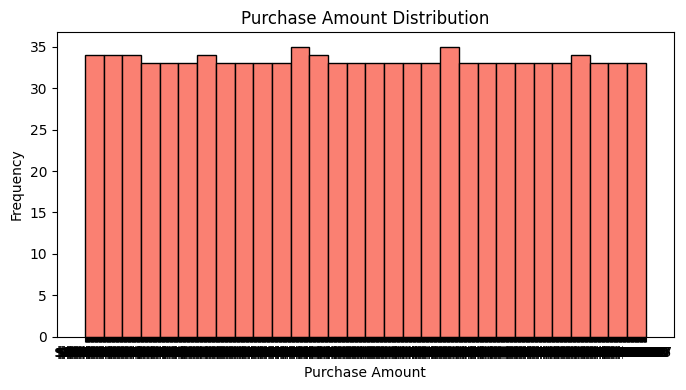

In [85]:
plt.figure(figsize=(7, 4))
plt.hist(df['Purchase_Amount'], bins=30, color='salmon', edgecolor='black')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()